In [ ]:
#importaciones de librerias necesarias
%pip install matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [53]:
# Cargar el archivo CSV
file_path = r'data/GeneraciónCauya2024.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a formato datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Identificar las columnas horarias de generación
hourly_columns = [col for col in data.columns if 'Values_Hour' in col]

# Manejo de valores faltantes: relleno con ceros (asumiendo que "nulo" implica sin generación)
data[hourly_columns] = data[hourly_columns].fillna(0)

# Crear una columna para la suma diaria de generación
data['Daily_Generation'] = data[hourly_columns].sum(axis=1)

# Crear una columna para el mes
data['Month'] = data['Date'].dt.to_period('M')

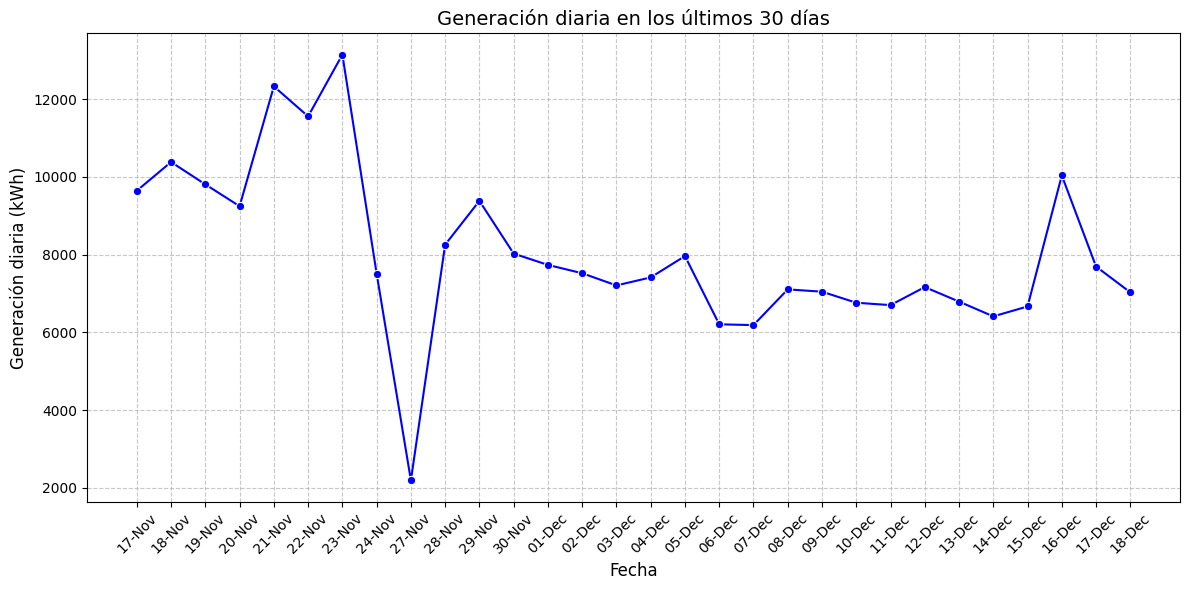

In [54]:
# Generación diaria de los últimos 30 días
last_30_days = data.sort_values('Date', ascending=False).head(30)
# Formatear solo día y mes
last_30_days['Day'] = last_30_days['Date'].dt.strftime('%d-%b')  
# Ordenar por mes y día para que aparezca primero novimebre y después diciembre
last_30_days = last_30_days.sort_values('Date', key=lambda x: x.dt.month * 100 + x.dt.day, ascending=True)  
plt.figure(figsize=(12, 6))
sns.lineplot(data=last_30_days, x='Day', y='Daily_Generation', marker='o', color='blue')
plt.title('Generación diaria en los últimos 30 días', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Generación diaria (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

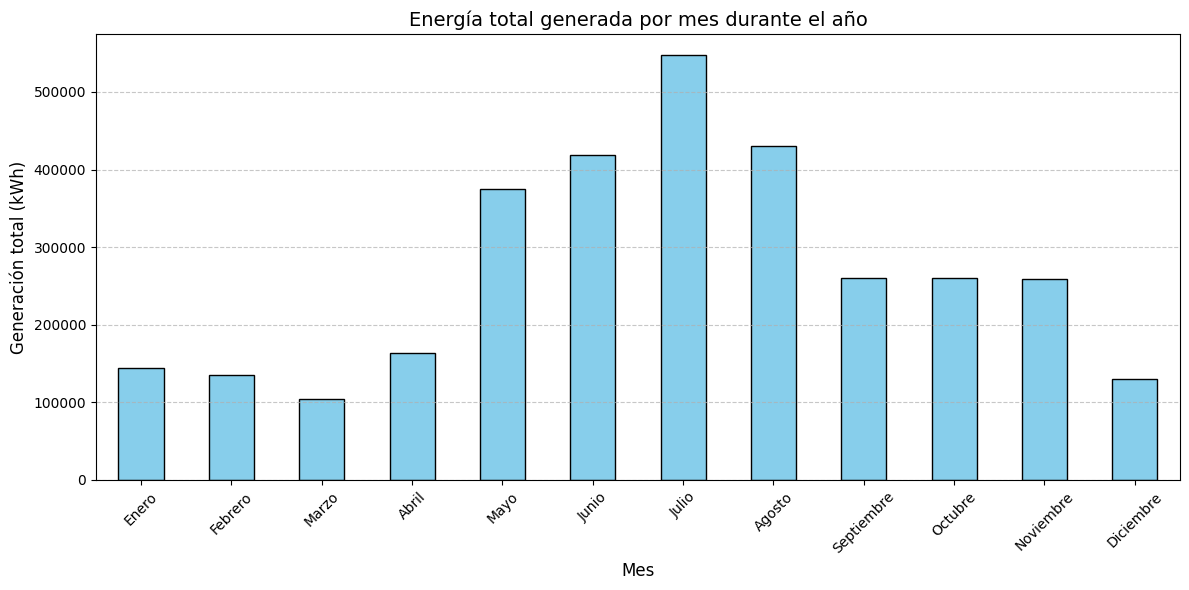

In [55]:
#Energía total generada por mes durante todo el año
monthly_generation = data.groupby('Month')['Daily_Generation'].sum()
plt.figure(figsize=(12, 6))
# Convertir a nombres de mes en inglés
monthly_generation.index = monthly_generation.index.strftime('%B')  
# Traducción de los nombres de los meses al español
month_translation = {
    'January': 'Enero', 'February': 'Febrero', 'March': 'Marzo', 'April': 'Abril',
    'May': 'Mayo', 'June': 'Junio', 'July': 'Julio', 'August': 'Agosto',
    'September': 'Septiembre', 'October': 'Octubre', 'November': 'Noviembre', 'December': 'Diciembre'
}
monthly_generation.index = monthly_generation.index.map(month_translation)
monthly_generation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Energía total generada por mes durante el año', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Generación total (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\wilmar\AppData\Local\Temp\ipykernel_4544\3452143609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_means.index, y=hourly_means.values, palette="viridis")


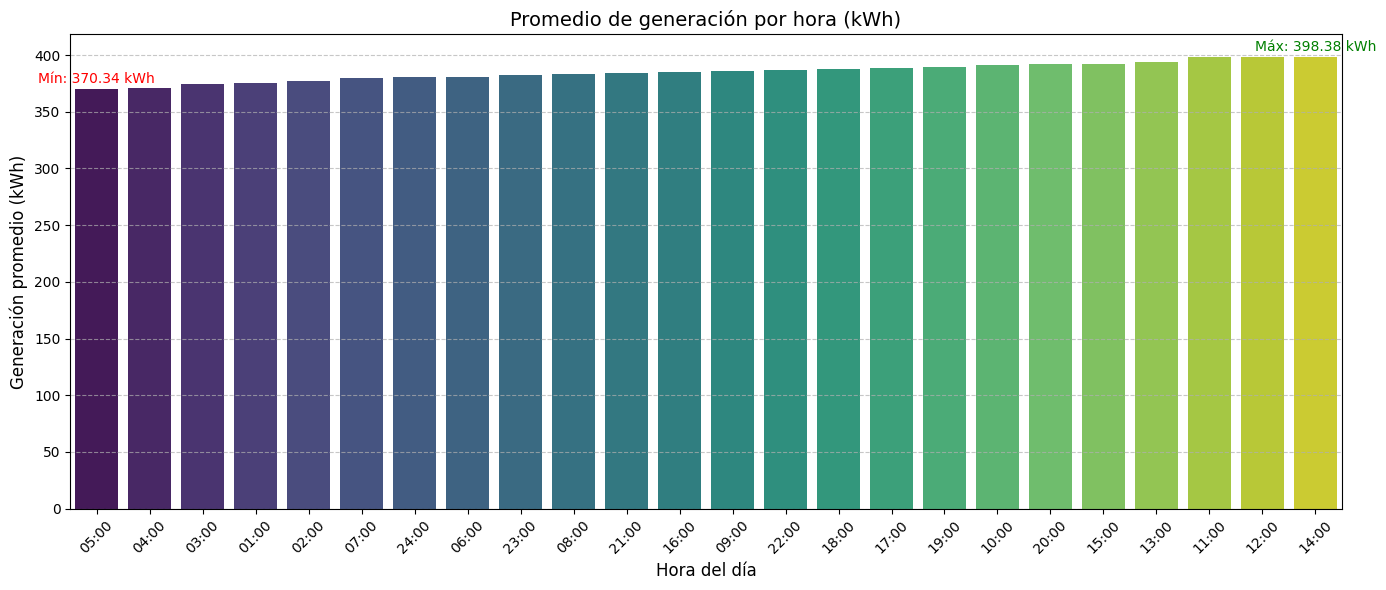

Hora con mayor generación: 14:00 (398.38 MWh)
Hora con menor generación: 05:00 (370.34 MWh)


In [56]:
#Análisis de generación por hora
hourly_means = data[hourly_columns].mean().sort_values()
hourly_means.index = [f"{int(col[-2:]):02d}:00" for col in hourly_means.index]  # Formatear a hora militar
plt.figure(figsize=(14, 6))
sns.barplot(x=hourly_means.index, y=hourly_means.values, palette="viridis")
plt.title('Promedio de generación por hora (kWh)', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Generación promedio (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anotaciones ajustadas para las horas de mayor y menor generación
max_hour = hourly_means.idxmax()
min_hour = hourly_means.idxmin()

# Ajustar las posiciones de las anotaciones para evitar que se salgan de la gráfica
plt.text(hourly_means.index.get_loc(max_hour), hourly_means[max_hour] + 5, 
         f"Máx: {hourly_means[max_hour]:.2f} kWh", color='green', ha='center', fontsize=10)
plt.text(hourly_means.index.get_loc(min_hour), hourly_means[min_hour] + 5, 
         f"Mín: {hourly_means[min_hour]:.2f} kWh", color='red', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


print(f"Hora con mayor generación: {max_hour} ({hourly_means[max_hour]:.2f} MWh)")
print(f"Hora con menor generación: {min_hour} ({hourly_means[min_hour]:.2f} MWh)")

C:\Users\wilmar\AppData\Local\Temp\ipykernel_4544\3236535064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Month', y='Daily_Generation', data=data, palette="muted", scale='width', inner='quartile')
C:\Users\wilmar\AppData\Local\Temp\ipykernel_4544\3236535064.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Month', y='Daily_Generation', data=data, palette="muted", scale='width', inner='quartile')


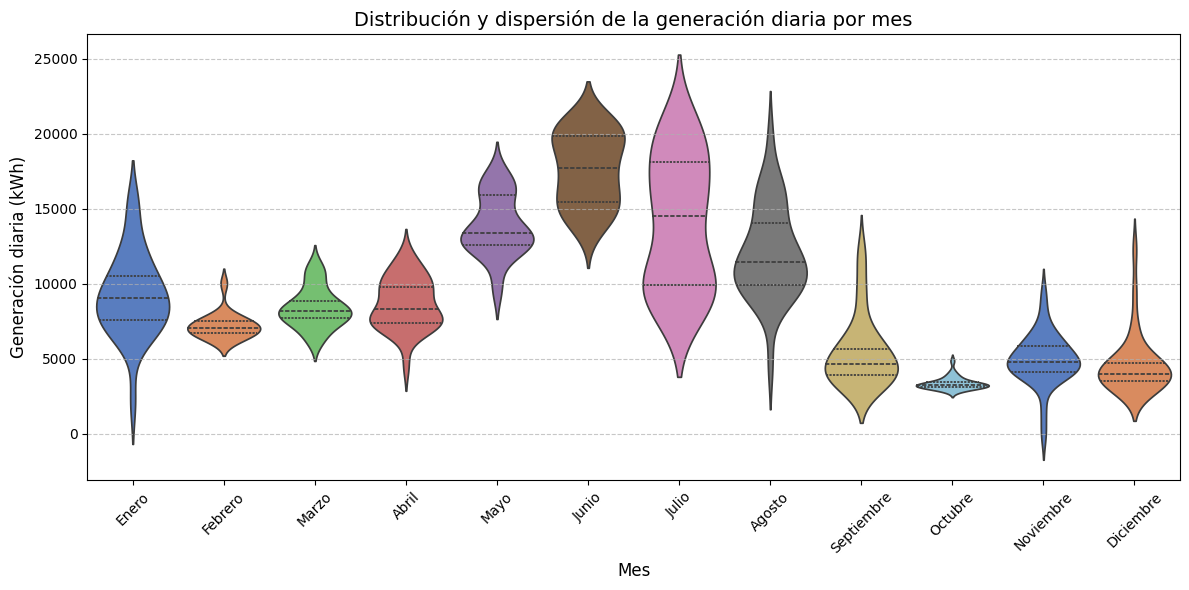

In [62]:
# Distribución de generación mensual
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='Daily_Generation', data=data, palette="muted", scale='width', inner='quartile')
plt.title('Distribución y dispersión de la generación diaria por mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Generación diaria (kWh)', fontsize=12)
plt.xticks(rotation=45, ticks=range(data['Month'].nunique()), labels=monthly_generation.index)  # Asegurar nombres de meses correctos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()